In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

c:\Users\Şeyma\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arrays\masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
dataset = fetch_openml('mnist_784')

In [3]:
dataset.data.shape

(70000, 784)

In [4]:
def showimage(df, index):
    some_digit = df[index]
    some_digit_img = some_digit.reshape(28,28)

    plt.imshow(some_digit_img,cmap="binary")
    plt.axis("off")
    plt.show()

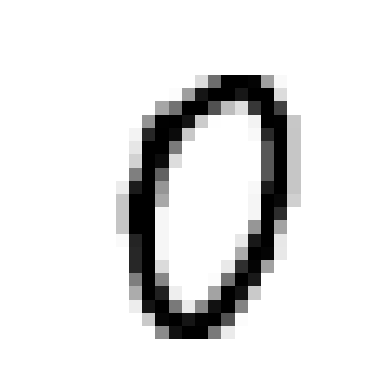

In [5]:
showimage(dataset.data, 1000)

In [6]:
train_img, test_img, train_label, test_label = train_test_split(dataset.data, dataset.target, test_size=1/7.0, random_state=0)


In [7]:
test_img_copy = test_img.copy()

In [8]:
scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [9]:
pca = PCA(.90)

pca.fit(train_img)

print(pca.n_components_)

234


In [10]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [11]:
regression = LogisticRegression(solver = 'lbfgs', max_iter=10000)

regression.fit(train_img, train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
regression.predict(test_img[777].reshape(1,-1))

array(['9'], dtype=object)

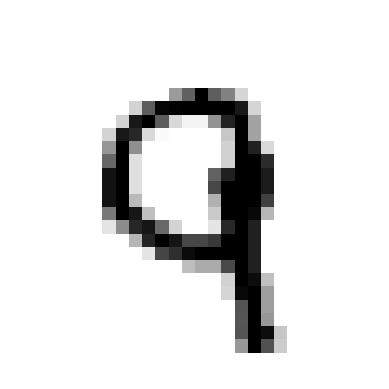

In [13]:
showimage(test_img_copy, 777)

In [14]:
regression.score(test_img, test_label)

0.9197